In [5]:
import pandas as pd
import numpy as np
import shapely.geometry as geom
import os
from dbfread import DBF
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from wand.image import Image
import math
from wand.display import display

In [7]:
img = Image(filename ="D:/bda/Bulk Order 898560/NAIP GEOTIFF/m_3812101_se_10_h_20160711/m_3812101_se_10_h_20160711.tif")

C:\Users\marce\Anaconda3\lib\site-packages\wand\image.py:2758: CoderWarning: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912
  self.raise_exception()


In [8]:
img.resize(math.floor(img.size[0]*.5),math.floor(img.size[1]*.5))

In [11]:
img.size

(4845, 6090)

In [11]:
path = "D:/bda/Bulk Order 898560/NAIP GEOTIFF"
dirs = os.listdir(path)

In [5]:
#Resize_photos and movefiles to new dir
for folder in dirs:
    name = os.listdir(os.path.join(path, folder))[0]
    newpath = os.path.join(path, folder)
    img = Image(filename = os.path.join(newpath, name))
    img.resize(math.floor(img.size[0]*.5),math.floor(img.size[1]*.5))
    img.save(filename = os.path.join("D:/smaller_photos", name))
    txtname = os.listdir(os.path.join(path, folder))[1]
    os.rename(os.path.join(newpath, txtname), os.path.join("D:/smaller_photos", txtname))

C:\Users\marce\Anaconda3\lib\site-packages\wand\image.py:2758: CoderWarning: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912
  self.raise_exception()


IndexError: list index out of range

In [12]:
#put all txt files in a list
path = "D:/smaller_photos"
filelist = []
for file in os.listdir(path):
    if file.endswith(".txt"):
        filelist.append(os.path.join(path, file))

In [13]:
#extract long lat and date into a dataframe
import pandas as pd
dir_df = pd.DataFrame(columns = ["name", "date", "west", "east", "north", "south"])
count = 0
for file in filelist:
    file1 = file.split("\\")[1].strip().replace(".txt", ".tif")
    with open(file) as f:
        while True:
            text = f.readline()
            if("Calendar_Date:" in text):
                date = text.split(":")[1].strip()
            if("Bounding_Coordinates" in text):
                west = float(f.readline().split(":")[1].strip())
                east = float(f.readline().split(":")[1].strip())
                north = float(f.readline().split(":")[1].strip())
                south = float(f.readline().split(":")[1].strip())
                data1 = pd.DataFrame(data = {"name": file1, "date": date, "west": west, "east":east, "north":north, "south":south}, index = [count])
                dir_df = pd.concat([dir_df, data1])
                count +=1
                break
        f.close()      

In [138]:
dir_df = dir_df.reset_index(drop = True)
#make a shape for each picture
for i in range(0,100):
    dir_df.loc[i, "geometry"] =geom.Polygon([[dir_df.loc[i,"west"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "south"]], [ dir_df.loc[i,"west"],dir_df.loc[i, "south"]]])
#convert to geodf
geo_df = gpd.GeoDataFrame(dir_df, geometry = dir_df["geometry"])

In [24]:
#convert to geodf
geo_df = gpd.GeoDataFrame(dir_df, geometry = dir_df["geometry"])

In [123]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

(38.2, 39)

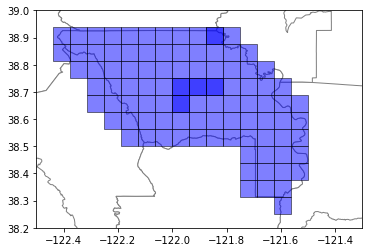

In [132]:
ax = yolo.plot(color = "white", edgecolor = "gray")
geo_df.plot(ax =ax, edgecolor = 'black',color = 'blue', alpha = 0.5)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])

In [1]:
from osgeo import gdal

In [2]:
ds = gdal.Open("D:/smaller_photos/m_3812101_se_10_h_20160711.tif")
type(ds)

osgeo.gdal.Dataset

In [3]:
pixel_vals = ds.ReadAsArray()

In [6]:
nir = pixel_vals[3].astype(np.float64)
red = pixel_vals[0].astype(np.float64)
ndvi = (nir - red)/(nir + red)

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'NDVI Filter')

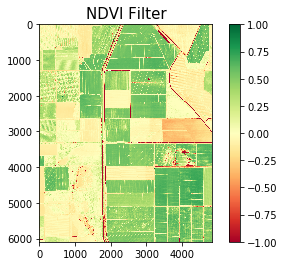

In [17]:
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title("NDVI Filter", fontsize = 15)

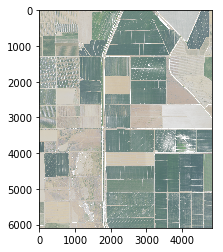

In [126]:
from PIL import Image
img = Image.open("D:/smaller_photos/m_3812101_se_10_h_20160711.tif")
plt.imshow(img)

In [133]:
fields = gpd.read_file("Crops_2016/2016_Crops.shp")
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,POLYGON ((-134576.5216000006 47226.76740000024...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-138009.7673000004 47728.80819999985...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-138604.3568999991 47672.40379999951...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-139027.8567999993 48592.56189999916...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,POLYGON ((-138902.8745000008 48366.05260000005...
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,POLYGON ((-138780.4605999999 48059.62829999998...
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,POLYGON ((-138467.6105000004 47327.77769999951...
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,POLYGON ((-138806.9781999998 47063.60270000063...
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,POLYGON ((-139317.6993000004 46669.26840000041...
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,POLYGON ((-138359.0604999997 50272.86339999922...


In [26]:
#geo_df.to_file(filename="pic_coords.shp",driver='ESRI Shapefile')
#fields.to_file(filename="fields_corrected.shp",driver='ESRI Shapefile')

In [134]:
fields.crs = {"init":"epsg:3310"}
fields = fields.to_crs("+proj=longlat +datum=WGS84 +no_defs ")
geo_df.crs = {"init":"epsg:4326"}
geo_df.crs

In [135]:
#fields.crs = {"init":"epsg:3310"}
#geo_df.crs = {"init":"epsg:4326"}
#geo_df.crs = = geo_df.to_crs("+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")

{'init': 'epsg:4326'}

In [136]:
geo_df

index_left,date,east,name,north,south,west,geometry
0,20160711,-121.8750,m_3812101_se_10_h_20160711.tif,38.9375,38.8750,-121.9375,"POLYGON ((-121.9375 38.9375, -121.875 38.9375,..."
1,20160711,-121.9375,m_3812101_sw_10_h_20160711.tif,38.9375,38.8750,-122.0000,"POLYGON ((-122 38.9375, -121.9375 38.9375, -12..."
2,20160711,-121.7500,m_3812102_se_10_h_20160711.tif,38.9375,38.8750,-121.8125,"POLYGON ((-121.8125 38.9375, -121.75 38.9375, ..."
3,20140726,-121.8125,m_3812102_sw_10_1_20140726.tif,38.9375,38.8750,-121.8750,"POLYGON ((-121.875 38.9375, -121.8125 38.9375,..."
4,20160711,-121.8125,m_3812102_sw_10_h_20160711.tif,38.9375,38.8750,-121.8750,"POLYGON ((-121.875 38.9375, -121.8125 38.9375,..."
5,20160711,-121.8750,m_3812109_ne_10_h_20160711.tif,38.8750,38.8125,-121.9375,"POLYGON ((-121.9375 38.875, -121.875 38.875, -..."
6,20160711,-121.9375,m_3812109_nw_10_h_20160711.tif,38.8750,38.8125,-122.0000,"POLYGON ((-122 38.875, -121.9375 38.875, -121...."
7,20160711,-121.8750,m_3812109_se_10_h_20160711.tif,38.8125,38.7500,-121.9375,"POLYGON ((-121.9375 38.8125, -121.875 38.8125,..."
8,20160711,-121.9375,m_3812109_sw_10_h_20160711.tif,38.8125,38.7500,-122.0000,"POLYGON ((-122 38.8125, -121.9375 38.8125, -12..."
9,20160711,-121.7500,m_3812110_ne_10_h_20160711.tif,38.8750,38.8125,-121.8125,"POLYGON ((-121.8125 38.875, -121.75 38.875, -1..."


In [137]:
fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,None,POLYGON ((-121.5435143790129 38.43134714591933...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.00,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-121.5829806146166 38.43535362263977...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.00,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-121.5897884711797 38.43475678825893...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-121.5948226102154 38.44296931203907...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.00,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,"POLYGON ((-121.5933455142271 38.4409508416019,..."
5,2771489,57,6129270,B14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,FIELD NORTH OF B15,1,54.00,ACRES,ALFALFA,54.034062,M07N03E24,57,57,POLYGON ((-121.5918825640575 38.43821315794216...
6,2770078,57,6129271,B15,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57,57,POLYGON ((-121.5881540782541 38.43167761245395...
7,2771692,57,6129272,B16,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,LAMB,1,40.00,ACRES,ALFALFA,44.585527,M07N03E25,57,57,POLYGON ((-121.5919948516327 38.42925025223892...
8,2770079,57,6129273,B17,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,Z-LINE ROAD,1,56.00,ACRES,ALFALFA,59.400268,M07N03E25,57,57,POLYGON ((-121.5977750579594 38.42562607534814...
9,2770462,57,6129274,B3,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,1/4 MILE WEST OF JEFFERSON @ DEEP WATER CHANNEL,1,30.00,ACRES,ALFALFA,28.628593,M07N03E13,57,57,POLYGON ((-121.5874748341517 38.45818404892704...
